<a href="https://colab.research.google.com/github/merriekay/CS66_F24/blob/main/Day18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Doubly Linked Lists
## Day18

### CS66: Introduction to Computer Science II | Fall 2024

Tuesday, October 29th, 2024

### Helpful Resources:
[📜 Syllabus](https://docs.google.com/document/d/1lnkmnAm0tfw2ybqhS01ylSqKfkOcAAkmrrZUuDjwHuU/edit?usp=drive_link) | [📬 CodePost Login](https://codepost.io/login) | [📆 Schedule](https://docs.google.com/spreadsheets/d/1FW9s8S04zqpOaA13JyrlNPszk5D-H9dBi7xX6o5VpgY/edit?usp=drive_link) | [🙋‍♂️ PollEverywhere](https://pollev.com/moore) | [🪴 Office Hour Sign-Up](https://calendly.com/meredith-moore/office-hours)

# Announcements:

### You should be working on:
__Exam #2__ will be released after class (12:15 pm) today
- __Due__: Tuesday, November 5th, by 11:59 pm
- to be completed individually
- No use of AI assistants allowed

### Upcoming:    
- Tuesday, 11/5: _no class_ GO VOTE!
    - Exam #2 is due by 11:59 pm.

## References for this lecture

Problem Solving with Algorithms and Data Structures using Python

Section 4.10-4.23: [https://runestone.academy/ns/books/published/pythonds/BasicDS/toctree.html](https://runestone.academy/ns/books/published/pythonds/BasicDS/toctree.html)

## Group Activity #1: Reverse a Linked List

Write a function that will reverse a singly linked list using the code below:

What is the Big-O time-complexity of your solution?

In [ ]:
class Node:
    def __init__(self,initdata):
        self.data = initdata
        self.next = None

    def getData(self):
        return self.data

    def getNext(self):
        return self.next

    def setData(self,newdata):
        self.data = newdata

    def setNext(self,newnext):
        self.next = newnext

class UnorderedList:

    def __init__(self):
        self.head = None
        
    def isEmpty(self):
        return self.head == None
    
    #this method is really a prepend - it puts the new node at the beginning
    def add(self,item):
        temp = Node(item)
        temp.setNext(self.head)
        self.head = temp
            
    def __repr__(self):
        list_representation = ""
        current = self.head #start with the Node at the head
        while current: #this will keep going until current equals None
            list_representation += str(current.getData())+" -> "
            current = current.getNext() #move on to the next Node in the list
        list_representation += "None" #the last one in the list points to None
        return list_representation
    
    def __getitem__(self,index):
        
        if index < 0:
            raise Exception("list index "+str(index)+" is out of range")
        
        current = self.head
        item_counter = 0
        
        while current and item_counter < index:
            
            current = current.getNext()
            item_counter += 1
            
        if current == None:
            raise Exception("list index "+str(index)+" is out of range")
            
        return current.getData()
    
    def pop(self,index):
        
        if index < 0:
            raise Exception("list index "+str(index)+" out of range")
        
        
        current = self.head
        previous = None
        item_counter = 0
        
        while current and item_counter < index:
            previous = current
            current = current.getNext()
            item_counter += 1
            
        if current == None:
            raise Exception("list index "+str(index)+" out of range")
            
        if previous == None:
            self.head = current.getNext()
        else:
            previous.setNext(current.getNext())
            
        return current.getData()
    
    def remove(self, value):
        """
        removes an item from a linked list by value
        """
        current = self.head
        previous = current
        found = False

        while not found:
            if current.getData() == value:
                # remove the item
                if previous is None:  # This means we're at the head of the list
                    self.head = current.getNext()  # Update head to skip over the current node
                else:
                    previous.setNext(current.getNext())
                    found = True
            else:
                previous = current
                current = current.getNext()


## Doubly Linked List

A __doubly linked list__ is like a linked list, except each node keeps track of the item both before _and_ after it in the list. 

We can also keep track of the _tail_ - the end of the list.

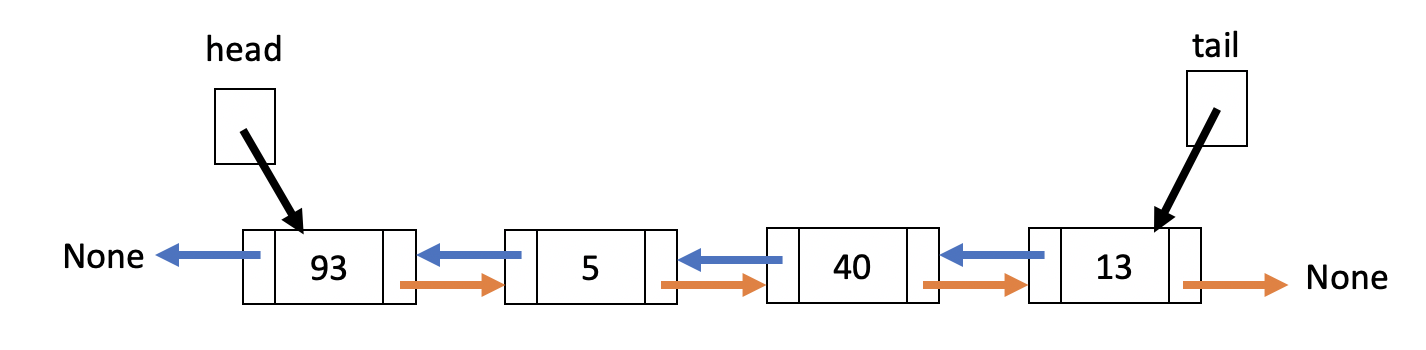

This gives us O(1) access to _both_ ends of the list - for adding or removing items from the ends!

We could use this to implement a queue in which both `enqueue` and `dequeue` are O(1). Hooray!

## Coding up a doubly linked list

The code for a doubly linked list is similar to a linked list, except

* You need to manage both the `prev` and `next` references for each node any time you add or remove an item
* Many things have to be broken down into several cases for when there are 0 items, 1 item, or more items

This can be a headache to implement - so I'm not going to make you add code to this. But, here's what the code looks like. 

In [5]:
class DoubleNode:
    def __init__(self,initdata):
        self.__data = initdata
        self.__next = None
        self.__prev = None

    def get_data(self):
        return self.__data

    def get_next(self):
        return self.__next
    
    def get_prev(self):
        return self.__prev

    def set_data(self,newdata):
        self.__data = newdata

    def set_next(self,newnext):
        self.__next = newnext
        
    def set_prev(self,newprev):
        self.__prev = newprev

class DoublyLinkedList:

    def __init__(self):
        """a DoublyLinkedList is initially empty"""
        self.__head = None
        self.__tail = None
        self.__length = 0
        
    def is_empty(self):
        return self.__head == None
    
    def size(self):
        return self.__length
    
    def append(self,item):
        #create the new node
        temp = DoubleNode(item)
        
        #case 1: the list is empty
        if self.is_empty():
            
            self.__head = temp
            self.__tail = temp
            
        #case 2: the list has 1 item 
        elif self.__length == 1:
                
            self.__tail = temp
            self.__tail.set_prev(self.__head)
            self.__head.set_next(self.__tail)
            
        #case 3: the list has 2 or more items
        else:

            self.__tail.set_next(temp)
            temp.set_prev(self.__tail)
            self.__tail = temp
            
        #update the length counter because we added an item
        self.__length += 1
    
    def prepend(self,item):
        #create the new node
        temp = DoubleNode(item)
        
        #case 1: the list is empty
        if self.is_empty():
            
            self.__head = temp
            self.__tail = temp
            
        #case 2: the list has 1 item 
        elif self.__length == 1:
                
            self.__head = temp
            self.__head.set_next(self.__tail)
            self.__tail.set_prev(self.__head)
            
        #case 3: the list has 2 or more items
        else:

            self.__head.set_prev(temp)
            temp.set_next(self.__head) 
            self.__head = temp 
            
        #update the length counter because we added an item
        self.__length += 1
        
    def __repr__(self):
        list_representation = "None <-> "
        current = self.__head #start with the Node at the head
        while current: #this will keep going until current equals None
            list_representation += str(current.get_data())+" <-> "
            current = current.get_next() #move on to the next Node in the list
        list_representation += "None" #the last one in the list points to None
        return list_representation
    
    def __getitem__(self,index):
        
        #case 1: the index is out of range - error
        if index >= self.__length or index < (-1)*self.__length:
            raise Exception("list index "+str(index)+" out of range")
        
        #case 2: positive index - count starting at the head
        elif index >= 0:
            current = self.__head
            item_counter = 0
            
            while current and item_counter < index:
                current = current.get_next()
                item_counter += 1
            
        #case 3: negative index - count starting at the tail
        else:
            current = self.__tail
            item_counter = -1
            
            while current and item_counter > index:
                current = current.get_prev()
                item_counter -= 1
                    
        return current.get_data()
    
    
    def pop(self,index):
        
        #case 1: the index is out of range - error
        if index >= self.__length or index < (-1)*self.__length:
            raise Exception("list index "+str(index)+" out of range")
        
        #case 2: the list is empty - error
        elif self.__head == None:
            raise Exception("You cannot pop from an empty list")
        
        #case 3: there is only one item
        elif self.__head == self.__tail and (index == 0 or index == -1):
            self.__length -= 1
            temp = self.__head
            self.__head = None
            self.__tail = None
            return temp.get_data()
        
        #case 4: 2 or more items, popping the first item
        elif index == 0 or index == self.__length*(-1):
            self.__length -= 1
            temp = self.__head
            self.__head.get_next().set_prev(None)
            self.__head = self.__head.get_next()
            return temp.get_data()
        
        #case 5: 2 or more items, popping the last item
        elif index == -1 or index == self.__length-1:
            self.__length -= 1
            temp = self.__tail
            self.__tail.get_prev().set_next(None)
            self.__tail = self.__tail.get_prev()
            return temp.get_data()
            
        #case 6: 2 or more items, popping a non-end, counting from left
        elif index > 0:
            self.__length -= 1
            
            current = self.__head
            trailing = None
            item_counter = 0
            
            while current and item_counter < index:
                trailing = current
                current = current.get_next()
                item_counter += 1

            trailing.set_next(current.get_next())
            current.get_next().set_prev(trailing)
            
            return current.get_data()
        
        #case 7: 2 or more items, popping a non-end, counting from right
        elif index < 0:
            self.__length -= 1
            
            current = self.__tail
            trailing = None
            item_counter = -1
            
            while current and item_counter > index:
                trailing = current
                current = current.get_prev()
                item_counter -= 1
                
            trailing.set_prev(current.get_prev())
            current.get_prev().set_next(trailing)
   
            return current.get_data()    
        
dll = DoublyLinkedList()
dll.append(1)
dll.append(2)
dll.append(3)
dll.prepend(4)
dll.prepend(5)
print("Here's the list:",dll)
print("Item at index 3:",dll[3])
print("Item at index -1:",dll[-1])
print("Popping index 3:",dll.pop(3))
print("Popping index -1:",dll.pop(-1))
print("Here's the resulting list:",dll)
print("Its size is",dll.size())

Here's the list: None <-> 5 <-> 4 <-> 1 <-> 2 <-> 3 <-> None
Item at index 3: 2
Item at index -1: 3
Popping index 3: 2
Popping index -1: 3
Here's the resulting list: None <-> 5 <-> 4 <-> 1 <-> None
Its size is 3


## Group Activity #2: Reverse a Doubly Linked List

Use the code above to reverse a doubly-linked-list. 

How does this compare to reversing a singly linked list in terms of time-complexity?

## Implementing a Queue using a Doubly Linked List

Recall: when we made our Queue ADT using a Python list as the underlying data structure, one of `enqueue` and `dequeue` had to be $O(n)$.

| Operation     | Python List (Array-Based) | Singly Linked List (with Tail) | Singly Linked List (no Tail) | Doubly Linked List (with Tail) |
|---------------|---------------------------|--------------------------------|------------------------------|---------------------------------|
| Enqueue (Add to end)   | Amortized O(1)*       | O(1)                          | O(n)                         | O(1)                            |
| Dequeue (Remove from front) | O(n)**       | O(1)                          | O(1)                         | O(1)                            |
| Access (by index)      | O(1)                   | O(n)                          | O(n)                         | O(n)                            |
| Search (by value)      | O(n)                   | O(n)                          | O(n)                         | O(n)                            |


We can now use a doubly linked list instead, and all the operations will be $O(1)$.

In [11]:
class Queue:
    def __init__(self):
        self.__dll = DoublyLinkedList()

    def is_empty(self):
        return self.__dll.is_empty()
    
    def enqueue(self,item):
        self.__dll.append(item)

    def dequeue(self):
        return self.__dll.pop(0)

    def size(self):
        return self.__dll.size()
    
    def __repr__(self):
        rval = "Front|"
        for i in range(self.size()):
            rval += str(self.__dll[i])+","
        rval = rval.strip(",")
        rval += "|Back"
        return rval
        
    
q = Queue()
q.enqueue(1)
q.enqueue(2)
q.enqueue(3)
q.enqueue(4)
q.enqueue(5)
print("Starting queue:",q)
print( q.dequeue() )
print( q.dequeue() )
print( q.dequeue() )
print("Ending queue:",q)
print("Size:",q.size() )

Starting queue: Front|1,2,3,4,5|Back
1
2
3
Ending queue: Front|4,5|Back
Size: 2


## Group Activity #3: Other ADTs

Chapter 4 of the book has implementations for two more Abstract Data Types that we haven't looked at yet:

* `Deque` - a double-ended-queueu: [https://runestone.academy/ns/books/published/pythonds/BasicDS/TheDequeAbstractDataType.html](https://runestone.academy/ns/books/published/pythonds/BasicDS/TheDequeAbstractDataType.html)
* `OrderedList` - a list that always keeps the items in a sorted order: [https://runestone.academy/ns/books/published/pythonds/BasicDS/TheOrderedListAbstractDataType.html](https://runestone.academy/ns/books/published/pythonds/BasicDS/TheOrderedListAbstractDataType.html)

The book uses an array (i.e., a Python list) to implement the Deque and a linked list to implement the OrderedList. However, like their implementation of the Queue, these may not necessarily be the best choices.

For each one, discuss, which would be the better choice to implement that ADT: array, linked list, or doubly-linked list. Give reasons to back up your choice. Time complexity of the different methods should be the main consideration, so start there, but you may be able to come up with some other reasons as well.

## Group Activity #5: `Deque`

While Python doesn't have a `Deque` built-in, there is a Collections library which contains a `Deque` that you can read about here: [https://docs.pyhon.org/3/library/collections.html](https://docs.python.org/3/library/collections.html)

Look at the description on that page, paying special attention to the Big O it gives for various operations. What is the Big O of 
* appending on the right
* appending on the left
* popping from the right
* popping from the left
* accessing an item in the middle of the deque by its index, like `d[10000]`

Based on what you know, how do you think they implement this `deque` class?

# Announcements:

### You should be working on:
__Exam #2__ will be released after class (12:15 pm) today
- __Due__: Tuesday, November 5th, by 11:59 pm
- to be completed individually
- No use of AI assistants allowed

### Upcoming:    
- Tuesday, 11/5: _no class_ GO VOTE!
    - Exam #2 is due by 11:59 pm.